In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import quantile_transform
from sklearn import preprocessing

nltk.download('punkt');
nltk.download('wordnet');
nltk.download('stopwords');

from utils import *

[nltk_data] Downloading package punkt to C:\Users\Simon
[nltk_data]     Andersen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Simon
[nltk_data]     Andersen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Simon
[nltk_data]     Andersen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Simon
[nltk_data]     Andersen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Simon
[nltk_data]     Andersen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Simon
[nltk_data]     Andersen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data

In [2]:
# discard senteces in df_data with less than 2 sentences
def keep_first_n_sentences(df):
    sentences = nltk.tokenize.sent_tokenize(df)
    
    n = min(len_dist(4,3),30)
    return ' '.join(sentences[:n])  # Join the first N sentences together

def count_sentences(text):
    sentences = nltk.tokenize.sent_tokenize(text)
    return len(sentences)

def concat_random_sentences(sentences):
    n = len_dist(5,2)  # Generate a random number between 2 and 10
    return ' '.join(sentences[:n])  # Join the first N sentences together

# Function to discard 90% of 1-sentence strings with label = 0
def discard_90_percent_0_labels(row):
    if len(nltk.tokenize.sent_tokenize(row['text'])) == 1 and row['label'] == 0:
        return random.random() > 0.9  # Discard with 90% probability
    return True

def is_all_uppercase(text):
    return text.isupper()

def len_dist(mean, std):
    positive = False
    while not positive:
        length = int(norm(mean, std).rvs())
        if length > 1:
            positive = True
    return length

In [14]:
def clean_text_strings(df_data, label_0_frequency = 0.5,):

    print(df_data.shape)

    # Filter the DataFrame to get rows with only one sentence
    single_sentence_mask = (df_data['text'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x))) == 1)
    
    single_sentence_rows = df_data[single_sentence_mask].copy()

    # Apply function to concatenate random sentences for each row
    single_sentence_rows['text'] = single_sentence_rows['text'].apply(lambda x: concat_random_sentences(nltk.tokenize.sent_tokenize(x)))

    # Append concatenated rows to the original DataFrame without the 1 sentence rows
    df = pd.concat([df_data[~single_sentence_mask], single_sentence_rows], ignore_index=True)

    print(df.shape)


    # Count the remaining label=0 and label=1 rows
    label_0_count = df[df['label'] == 0].shape[0]
    label_1_count = df[df['label'] == 1].shape[0]
    label_fraction = label_0_frequency / (1 - label_0_frequency)

    # Randomly discard label=1 rows to balance the labels
    if label_0_count < label_fraction * label_1_count:
        excess_rows =  - int((label_0_count - label_fraction * label_1_count))
        label_indices = df[df['label'] == 1].sample(n=excess_rows).index
        df = df.drop(label_indices)
  
    print(df.shape)

    # apply keep_first_n_sentences to df
    df['text'] = df.apply(lambda x: keep_first_n_sentences(x['text']), axis=1)

    print(df.shape)

    return df

In [28]:
# Function to concatenate random sentences
def concatenate_random_sentences(df, min_sentences=2, max_sentences=10):
    selected_sentences = random.randint(min_sentences, max_sentences)
    concatenated_sentences = ' '.join(df.sample(selected_sentences)['Sentence'])
    return concatenated_sentences



In [15]:
## read text csvs
df = pd.read_csv('data_processed/data_all.csv')
df['text'] = df['text'].astype(str)

df_val = pd.read_csv('data/val.csv', names=['text'])

## clean and modify df_data to more closely match the sentence distribution of df_val
df_data = clean_text_strings(df, label_0_frequency= 0.54)

(12208, 2)
(12208, 2)
(11147, 2)
(11147, 2)


In [17]:
single_sentence_mask.sum()

3092

In [39]:
df_data = pd.read_csv('data_processed/data_all.csv')
df_data['text'] = df_data['text'].astype(str)

single_sentence_mask = (df_data['text'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x))) == 1)

single_sentence_rows = df_data[single_sentence_mask].copy()

    

In [41]:
# Function to concatenate random sentences
def concatenate_random_sentences(df, min_sentences=2, max_sentences=10):
    selected_sentences = np.random.randint(min_sentences, max_sentences)
    concatenated_sentences = ' '.join(df.sample(selected_sentences)['text'])
    return concatenated_sentences

,text,label
4,"Trøske (hvidmuld, brunmuld) er et folkeligt na...",0
8,"Siger albuen til, når du giver hånd, løfter væ...",0
14,"Mest kendt er gulplet-ruterne, der er kortere ...",0
16,"stemninger, hænder, mand, kvinde, elsker, elsk...",0
19,Navnet Newcastle United blev vedtaget på et fo...,0
...,...,...
12186,Bedste hoteller i nærheden af Parc de Saleccia...,0
12191,"Dette er bilmærket, der samler luksus, fart og...",0
12198,Har mødt med sex fest når du hjælpe.,0
12199,Bedste billige hoteller i Canberra,0


In [71]:
def concatenate_random_sentences(df):
    num_sentences = np.random.randint(2, 10)
    random_indices = random.sample(range(len(df)), num_sentences)
    print(random_indices)
    selected_sentences = df.iloc[random_indices]['Sentence'].tolist()
    concatenated_sentences = ' '.join(selected_sentences)
    return concatenated_sentences


In [72]:
concat_random_sentences

<function __main__.concat_random_sentences(sentences)>

In [56]:
import random
# Example DataFrame with sentences
data = {
    'Sentence': [
        'This is sentence 1.',
        'Another sentence here.',
        'Yet another example sentence.',
        # Add more sentences as needed...
    ]
}
df_sentences = pd.DataFrame(data)

# Function to concatenate random sentences
def concatenate_random_sentences(df):
    num_sentences = np.random.randint(2, 10)
    random_indices = random.sample(range(len(df)), num_sentences)
    selected_sentences = df.iloc[random_indices]['Sentence'].tolist()
    concatenated_sentences = ' '.join(selected_sentences)
    return concatenated_sentences

# Create a new DataFrame with concatenated sentences
num_rows = 5  # Number of rows in the new DataFrame
new_data = {
    'Concatenated_Sentences': [concatenate_random_sentences(df_sentences) for _ in range(num_rows)]
}
df_concatenated = pd.DataFrame(new_data)

# Display the new DataFrame
print(df_concatenated)

TypeError: 'tuple' object is not callable

In [51]:
# Create a new DataFrame with concatenated sentences
num_rows = len(single_sentence_rows)
new_data = {'Concatenated_Sentences': [concatenate_random_sentences(single_sentence_rows['text']) for _ in range(num_rows)]}
df_concatenated = pd.DataFrame(new_data)

# Display the new DataFrame
print(df_concatenated)

TypeError: 'tuple' object is not callable

In [24]:

# Apply function to concatenate random sentences for each row
single_sentence_rows['text'] = single_sentence_rows['text'].apply(lambda x: concat_random_sentences(nltk.tokenize.sent_tokenize(x)))

In [25]:
for idx, row in single_sentence_rows.iterrows():
    print(row['text'])
    if idx > 30:
        break

Trøske (hvidmuld, brunmuld) er et folkeligt navn for den rest, der bliver tilbage efter et svampeangreb i veddet på træer og buske
Siger albuen til, når du giver hånd, løfter vægte eller bærer indkøbsposer hjem fra supermarkedet, skal du sige fra
Mest kendt er gulplet-ruterne, der er kortere distancer i Mols Bjerge, men også i de gamle skove ved Kalø Slotsruin, omkring den fuglerige Stubbe Sø, ved landsbyen Dråby og søkøbstaden Ebeltoft
stemninger, hænder, mand, kvinde, elsker, elskere, par, hjerte, hjerte, rød, karakter, tegn, elsker, følelse, nedbrydning, baggrund, tapet, widescreen, fullscreen, widescreen, HD wallpapers, baggrund, tapet
Navnet Newcastle United blev vedtaget på et forsamlingsmøde hvor hele byens fodboldentusiaster var inviteret, da man ville have hele byens støtte til fodboldholdet.
Måling lige før jeg spiste første is, 6,0mmol/l
oddoneout.dk er hostet af One.com
Håndtere synspunkter og reklamationer fra gæster og opfølgning på disse i samarbejde med afdelingsleder.


In [13]:
df_data.shape, df.shape

((11147, 2), (12208, 2))

In [ ]:
if 0:
    ## read text csvs
    df = pd.read_csv('data_processed/data_all_balanced.csv')
    df['text'] = df['text'].astype(str)

    df_val = pd.read_csv('data/val.csv', names=['text'])


In [7]:
data = preprocess(df_data, save = False, outpath = 'data_processed/data_all_features.csv')
val = preprocess(df_val, save = False, outpath = 'data_processed/val_features.csv')
hum = data[data['label'] == 0]
ai = data[data['label'] == 1]

In [9]:
data.describe()

,label,sentence_count,mean_words_per_sentence,std_words_per_sentence,neighbor_sentences_diff,neighbor_sentences_diff_std,abbrev_per_sentence,capitals_per_sentence,avg_dash_quest_semicolon_per_sentence,double_quest_excl_count,avg_excl_per_sentence,human_fillers,ai_fillers,ai_fillers2,woke,fake_news,ai_words1,ai_words2
count,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000,11147.000000
mean,0.452409,3.285996,18.495421,4.541801,6.855864,2.548726,0.572211,2.610815,0.298051,0.002063,0.015692,0.044468,0.035529,0.001002,0.003799,0.001320,0.019333,0.002555
std,0.497752,2.262201,12.659055,11.270941,21.237555,6.186160,0.400385,4.800390,2.612284,0.057579,0.079171,0.142738,0.123153,0.018408,0.036411,0.025469,0.077456,0.030893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,18.500000,3.768830,5.250000,0.500000,0.666667,1.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,22.500000,6.468258,9.166667,4.031129,1.000000,3.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,13.000000,716.000000,699.000000,1398.000000,317.512204,5.000000,262.500000,198.000000,3.000000,2.333333,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Explore value count for each feature
columns_to_iterate = [col for col in hum.columns if col != 'label']
for col in columns_to_iterate:
    print(col)
    print("HUMAN: ", hum[col].mean(), "\u00B1", hum[col].std())
    print("AI: ", ai[col].mean(), "\u00B1",  ai[col].std())
    print("VALIDATION: ", val[col].mean(), "\u00B1", val[col].std(), "\n")

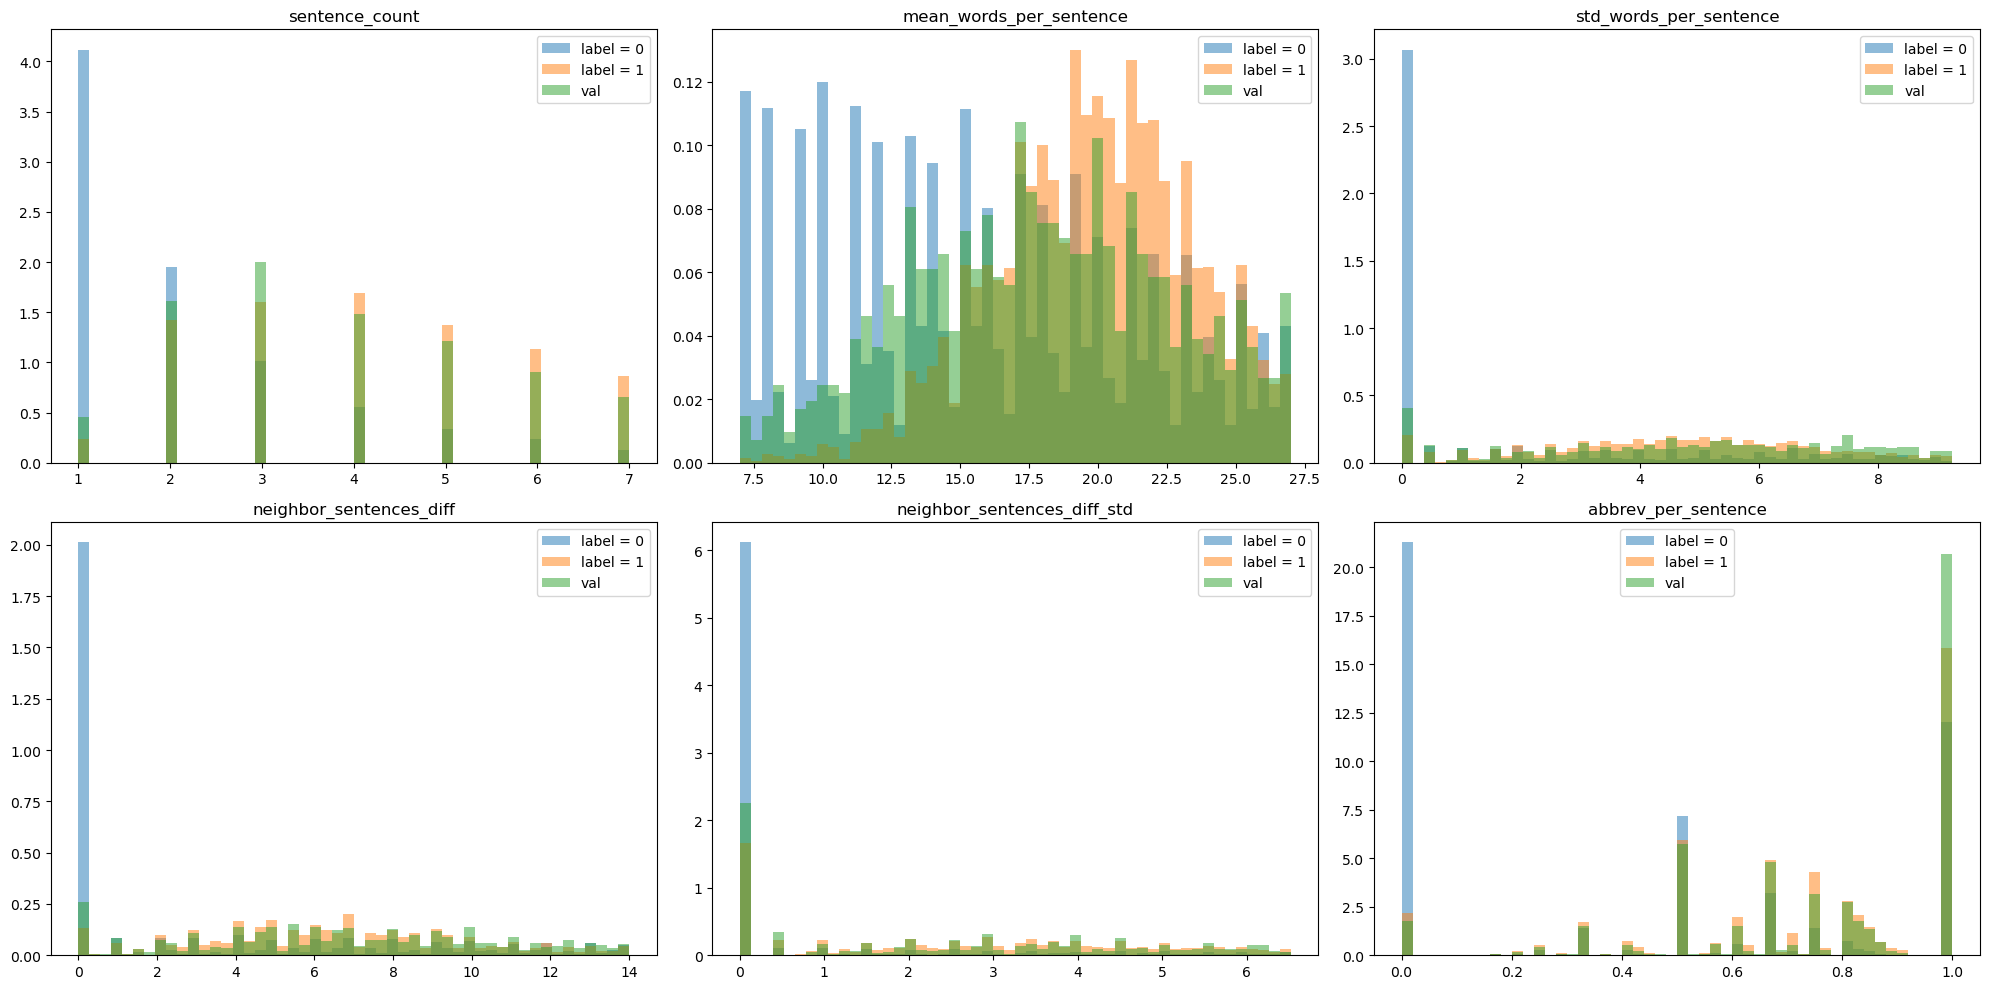

In [8]:
# Make histograms of the features for the training data (for labeel = 0 and label = 1 separately) and val data

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:7]):
    # find percentles
    cutoff = 0.1
    bins = 50
    q99 = np.quantile(data[col], 1 - cutoff)
    q01 = np.quantile(data[col], 0 + cutoff)
    range = (q01, q99)
   # range = (min(data[col]), max(data[col]  ))
    ax[i].hist(data[col][data['label'] == 0], range = range, bins=bins, alpha=0.5, label='label = 0', density=True)
    ax[i].hist(data[col][data['label'] == 1], range = range, bins=bins, alpha=0.5, label='label = 1', density=True)
    ax[i].hist(val[col], bins=bins, range = range, alpha=0.5, label='val', density=True)
    ax[i].set_title(col)
    ax[i].legend()


plt.tight_layout()
plt.show()

In [7]:
#make correlation matrix
corr = data.corr()
# plot the heatmap with seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)
plt.show()


: 

In [35]:
pca = PCA(n_components=2)

data_X = data.drop(['label'], axis=1) #We are not going to use the target for unsupervised learning
X = quantile_transform(data_X, copy=True)

X_new = pca.fit_transform(X)
X_val = quantile_transform(val, copy=True)
X_val = pca.fit_transform(X_val)
df_val = pd.DataFrame(data = X_val
             , columns = ['PC 1', 'PC 2'])


df_X = pd.DataFrame(data = X_new
             , columns = ['PC 1', 'PC 2'])
df_y = pd.DataFrame(data = data['label'], columns = ['label'])

finalDf = pd.concat([df_X, data['label']], axis = 1)
finalDf.head()

,PC 1,PC 2,label
0,0.214332,0.700860,0.0
1,-0.005106,-0.363557,1.0
2,-0.561218,0.050053,0.0
3,0.052487,-0.473238,1.0
4,0.208385,-0.590250,NaN


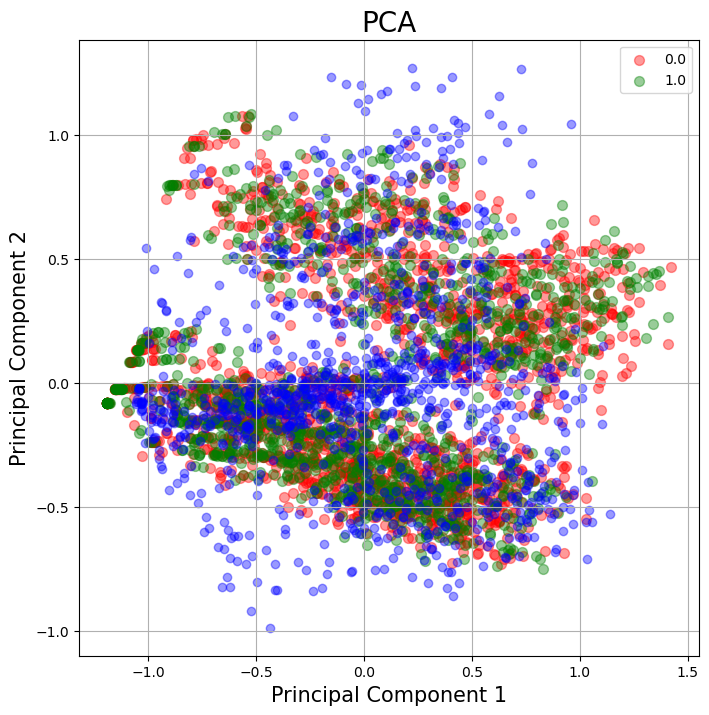

In [37]:
# Show the graphics.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50, alpha=.4)
ax.scatter(df_val.loc[:,'PC 1'], df_val.loc[:,'PC 2'],color='blue', alpha=.4)
ax.legend(targets)
ax.grid()

In [38]:
# a quick function for plotting our PCA components
def plot_pca(y_pcs, y, fig = None, ax = None):
    #=== plot PCA results
    if fig is None and ax is None:
        fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
    #ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
    #ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

    # locate the points of each type in the original data
    # and paint them over the transformed data
    is_type1 = (y == 0)
    is_type2 = (y == 1)
    ax.scatter(y_pcs[is_type1, 0], y_pcs[is_type1, 1], 
               c='r', marker='o', s = 3, label='Type 1', alpha=.3)
    ax.scatter(y_pcs[is_type2, 0], y_pcs[is_type2, 1], 
               c='g', marker='o', s=3, label='Type 2', alpha=.3)
    ax.legend()
    #plt.show()
    return 

In [1]:
# standardize X using a variety of preprocessing schemes
pca_kernel_list = [KernelPCA(n_components=2,kernel='linear'), KernelPCA(n_components=2,kernel='rbf'),
                   KernelPCA(n_components=2,kernel='poly'), KernelPCA(n_components=2,kernel='cosine')]
kernel_name_list = ['linear', 'rbf', 'poly', 'cosine']
for transform in pca_kernel_list:

    transform_list = [preprocessing.StandardScaler(), preprocessing.PowerTransformer(), preprocessing.QuantileTransformer()]
    name_list = ['StandardScaler', 'PowerTransformer', 'QuantileTransformer']
    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(15,6))
    ax = ax.flatten()
    for i,transform in enumerate(transform_list):
        # transform X_std
        X_std = transform.fit_transform(data)

        y_pcs = pca.fit_transform(X_std) # train pca object
        val_std = transform.fit_transform(val)
        y_pcs_val = pca.fit_transform(val_std)
        ax[i].set(title = f'{name_list[i]}')
        fig.suptitle(f'PCA with {kernel_name_list[i]} kernel', fontsize=16)
        # plot new PCA results
        ax[i].scatter(y_pcs_val[:,0], y_pcs_val[:,1], color='blue', alpha=.4, s=3, label='val')
        #plot_pca(y_pcs, finalDf['label'], fig, ax[i])
        

NameError: name 'KernelPCA' is not defined